In [1]:
from test_MDbrew.opener import DumpOpener
from test_MDbrew.extractor import Extractor
data = DumpOpener('./test.lammpstrj')
extractor = Extractor(data=data)
pos1 = extractor.extract_position(type_=1, wrapped=True)
pos2 = extractor.extract_position(type_=2, wrapped=True)
system_size = extractor.system_size

 STEP (Done) :  get_database		->  1.63 s ✅ 
 STEP (Done) :  get_columns		->  0.00 s ✅ 
 STEP (Done) :  get_system_size		->  0.00 s ✅ 
 STEP (Done) :  extract_position	->  0.65 s ✅ 
 STEP (Done) :  extract_position	->  0.62 s ✅ 


In [2]:
from test_MDbrew.rdf import RDF
resolution = 10000
rdf_11 = RDF(pos1, pos1, system_size)
rdf_12 = RDF(pos1, pos2, system_size)
rdf_21 = RDF(pos2, pos1, system_size)
rdf_22 = RDF(pos2, pos2, system_size)
rdf_11.get_rdf(r_max=system_size[0][1], resolution=resolution)
rdf_12.get_rdf(r_max=system_size[0][1], resolution=resolution)
rdf_21.get_rdf(r_max=system_size[0][1], resolution=resolution)
rdf_22.get_rdf(r_max=system_size[0][1], resolution=resolution)

 RDF  (STEP) : 100%|################| 401/401 [00:11<00:00, 35.12it/s]


array([0.        , 0.        , 0.        , ..., 0.95528002, 0.95610519,
       0.96347084])

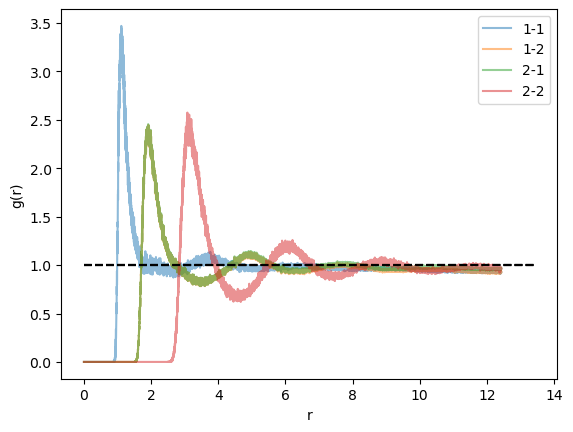

In [5]:
import numpy as np
import matplotlib.pyplot as plt
alp=0.5
bins = 1
rdf_11.plot_g_r(bins = bins, label = '1-1', alpha=alp)
rdf_12.plot_g_r(bins = bins, label = '1-2', alpha=alp)
rdf_21.plot_g_r(bins = bins, label = "2-1", alpha=alp)
rdf_22.plot_g_r(bins = bins, label = '2-2', alpha=alp)
# plt.xlim(-0.1,10.1)
# plt.xticks(np.arange(0,11,1))
plt.tick_params(axis='x', which='minor',bottom=False)
plt.legend()

In [4]:
rdf_11.get_CN()
rdf_12.get_CN()
rdf_21.get_CN()
rdf_22.get_CN()

array([  0.        ,   0.        ,   0.        , ..., 135.15182544,
       135.17122195, 135.19005985])

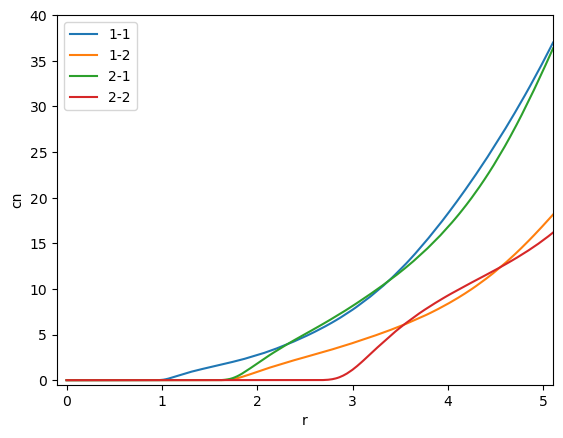

In [5]:
rdf_11.plot_cn(label = '1-1')
rdf_12.plot_cn(label = '1-2')
rdf_21.plot_cn(label = '2-1')
rdf_22.plot_cn(label = '2-2')
plt.xlim(-0.1,5.1)
plt.ylim(-0.5, 40)
plt.legend()